In [14]:
import numpy as np
import time
import random
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms
import torch.utils.data
import torch.nn
import os
from matplotlib import pyplot as plt
from keras.datasets import mnist

# Загрузка данных

In [15]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

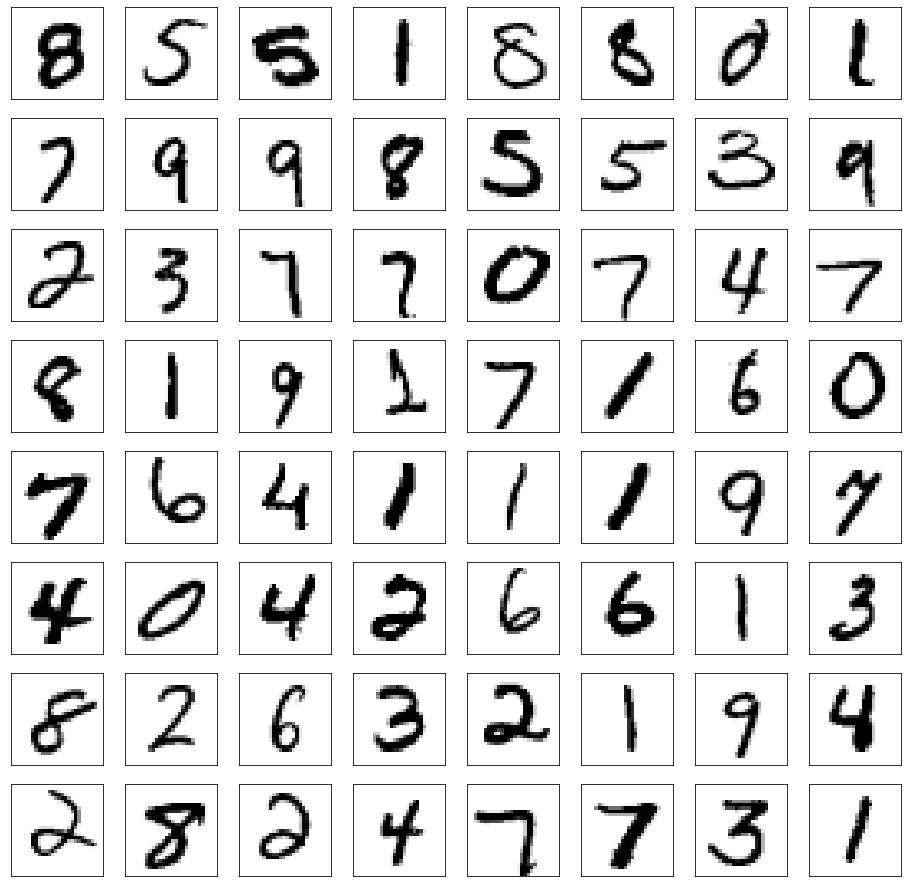

In [16]:
plt.figure(figsize=(16, 16))
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[random.randint(0, len(x_train) - 1)], cmap=plt.get_cmap('binary'))
plt.show()

In [17]:
x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float')
x_train /= 255

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float')
x_test /= 255

In [18]:
train_y = np.zeros((60000,10), dtype=int)
for i in range(60000):
    train_y[i][y_train[i]] = 1
y_train = train_y

test_y = np.zeros((10000,10), dtype=int)
for i in range(10000):
    test_y[i][y_test[i]] = 1
y_test = test_y

# Обучение нейронной сети

In [19]:
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis = 1, keepdims = True)

def cross_entropy_loss(y, u):
    return np.mean(-np.sum(y * np.log(u), axis = 1))
    
def accuracy(x, y):
    return np.mean(np.argmax(x, axis = 1) == np.argmax(y, axis = 1))

In [20]:
class neural_network:
    # конструктор класса
    def __init__(self, in_layer, h_layer, out_layer):        
        self.W_h = np.random.randn(in_layer, h_layer) * 0.005
        self.W_e = np.random.randn(h_layer, out_layer) * 0.005
        self.b_h = np.zeros((1, h_layer))
        self.b_e = np.zeros((1, out_layer))
        self.batch = batch
        self.learning_rate = learning_rate
    
    def forward(self,x):
        self.v_h = np.matmul(x, self.W_h) + self.b_h
        self.relu = relu(self.v_h)
        self.v_e = np.matmul(self.relu, self.W_e) + self.b_e
        self.softmax = softmax(self.v_e)
        
    def backward(self, x, y):
        d_1= (self.softmax - y) / self.softmax.shape[0]
        d_2 = np.matmul(d_1, self.W_e.transpose()) * np.where(self.v_h > 0, 1, 0)
        
        self.W_e -= learning_rate * np.matmul(self.relu.transpose(), d_1)
        self.b_e -= learning_rate * np.sum(d_1, axis = 0, keepdims = True)
        self.W_h -= learning_rate * np.matmul(x.transpose(), d_2)
        self.b_h -= learning_rate * np.sum(d_2, axis = 0, keepdims = True)
        
    def train(self, x, y, epochs):
        start_total_time = time.time()
        for epoch in range(epochs):
            start_epoch_time = time.time()
            for i in range(0, len(x), batch):
                x_batch = x[i : i + batch]
                y_batch = y[i : i + batch]
                self.forward(x_batch)
                self.backward(x_batch, y_batch)
        
            self.forward(x)
            print('Epoch ' + str(epoch) + ":")
            print("        loss:     " + str(cross_entropy_loss(y, self.softmax)))
            print("        accuracy: " + str(accuracy(y, self.softmax)))
            print("        time:     " + str(time.time() - start_epoch_time))
        print("Total time:     " + str(time.time() - start_total_time))
    
    def test(self, x, y):
        start_time = time.time()
        self.forward(x)
        print('accuracy_test =', accuracy(y, self.softmax))
        print("Total time:     " + str(time.time() - start_time))

In [22]:
learning_rate = 0.1
batch = 64
network_object = neural_network(784, 300, 10)
network_object.train(x_train, y_train, 20)

Epoch 0:
        loss:     0.2903220567089379
        accuracy: 0.9127666666666666
        time:     2.4699532985687256
Epoch 1:
        loss:     0.2045745802316672
        accuracy: 0.9399333333333333
        time:     2.6286754608154297
Epoch 2:
        loss:     0.15782233289375727
        accuracy: 0.9536166666666667
        time:     2.653831720352173
Epoch 3:
        loss:     0.12735101917544922
        accuracy: 0.9631333333333333
        time:     2.5608749389648438
Epoch 4:
        loss:     0.10609986582495494
        accuracy: 0.9697166666666667
        time:     3.0647122859954834
Epoch 5:
        loss:     0.09064179531404269
        accuracy: 0.9741
        time:     2.6158697605133057
Epoch 6:
        loss:     0.07870878961127287
        accuracy: 0.9776666666666667
        time:     2.4525530338287354
Epoch 7:
        loss:     0.06900906730674534
        accuracy: 0.9807166666666667
        time:     2.52156925201416
Epoch 8:
        loss:     0.06128621175371153
  

# Проверка нейронной сети на тестовых данных

In [23]:
network_object.test(x_test, y_test)

accuracy_test = 0.9801
Total time:     0.09602189064025879


# Torch реализация

Number of train samples: 60000
Number of test samples: 10000


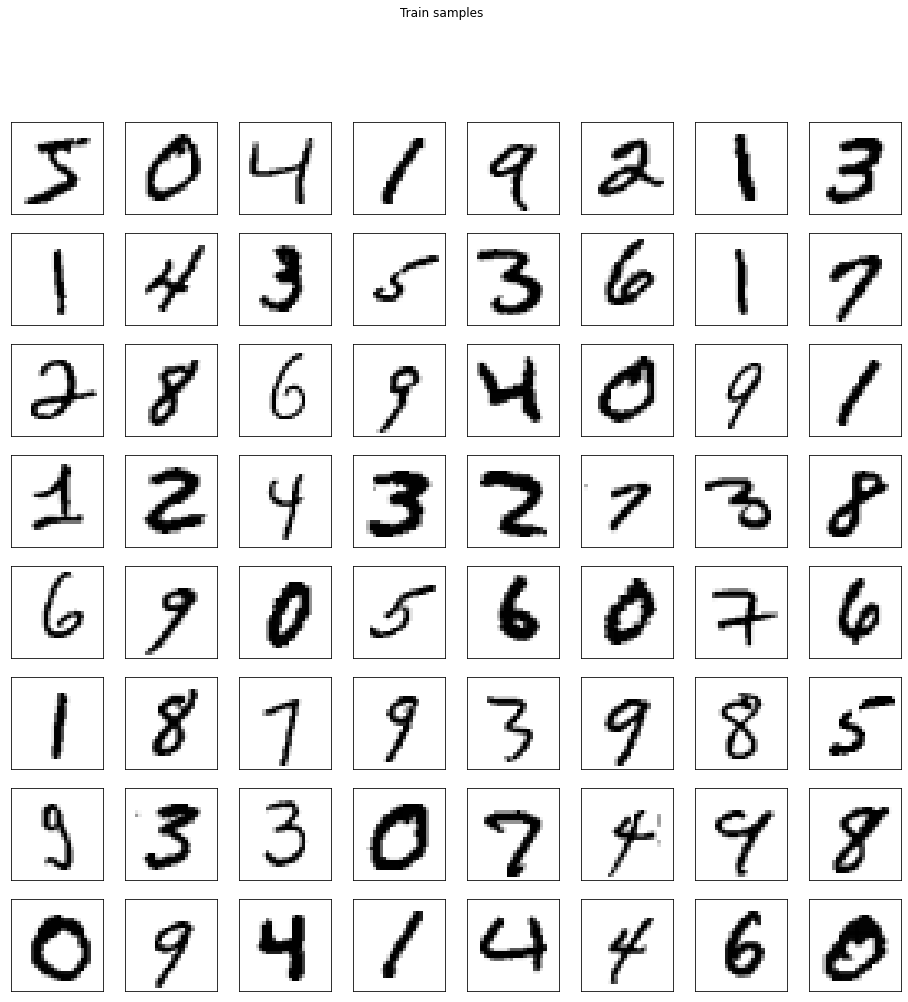

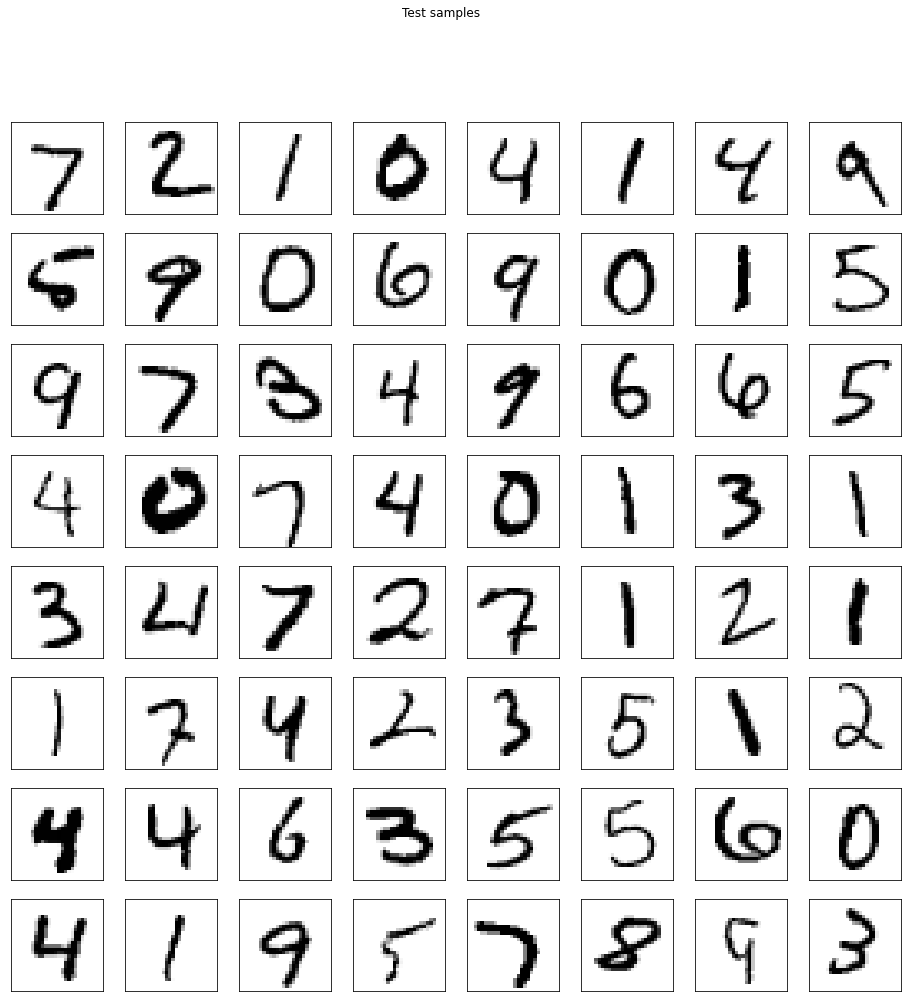

In [24]:
dir_name = os.getcwd()
batch_size = 64 

def show_images(images, title):
    num_showed_imgs_x = 8
    num_showed_imgs_y = 8
    
    figsize = (16, 16)
    fig, axes = plt.subplots(num_showed_imgs_y, num_showed_imgs_x, figsize = figsize)
    fig.suptitle(title)
    plt.setp(plt.gcf().get_axes(), xticks = [], yticks = [])
    for i, ax in enumerate(axes.flat):
        img = images[i][0].numpy().transpose(1, 2, 0).squeeze(axis = 2)
        ax.imshow(img, cmap = 'binary')

train_dataset = torchvision.datasets.MNIST(root = dir_name, train = True, download = True,
                                           transform = torchvision.transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root = dir_name, train = False, download = True,
                                          transform = torchvision.transforms.ToTensor())

print('Number of train samples: {}'.format(len(train_dataset)))
show_images(train_dataset, 'Train samples')

print('Number of test samples: {}'.format(len(test_dataset)))
show_images(test_dataset, 'Test samples')

train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                                shuffle = True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size,
                                               shuffle = False)

In [25]:
class TorchNeuralNetwork(torch.nn.Module):

    def __init__(self,input_layer_size, hidden_layer_size, count_class):
        super(TorchNeuralNetwork, self).__init__()
        self.l1 = torch.nn.Linear(input_layer_size, hidden_layer_size)
        self.l2 = torch.nn.Linear(hidden_layer_size, count_class)

    def forward(self, x):
        res = self.l1(x)
        res = torch.nn.functional.relu(res)
        res = self.l2(res)
        res = torch.nn.functional.softmax(res)
        return res
    
def get_accuracy(data_loader, model):
    device = torch.device("cpu")
    tp = 0
    n = 0
    with torch.no_grad():
        for images, labels in data_loader: 
            images = images.view(-1, 784).requires_grad_().to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            n += labels.size(0)
            tp += (predicted == labels).sum()
    return tp / n


def train_torch(nn_model_torch, train_data_loader, num_epochs, learning_rate):
    device = torch.device("cpu")
    nn_model_torch.to(device)

    loss_function = torch.nn.CrossEntropyLoss()

    optimizer = torch.optim.SGD(nn_model_torch.to(device).parameters(), lr = learning_rate)
    train_time = 0
    for epoch in range(num_epochs):
        start = time.time()
        for i, (images, labels) in enumerate(train_data_loader):
            images = images.view(-1, 784).requires_grad_().to(device)
            labels = labels.to(device)

            outputs = nn_model_torch(images)
            loss = loss_function(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        finish = time.time()
        train_time += finish - start
        print('Epoch ' + str(epoch) + ":")
        print("        accuracy: " + str(get_accuracy(train_data_loader, nn_model_torch).item()))
        print("        time:     " + str(finish - start))
    print("Total time:     " + str(train_time))

In [26]:
nn_model_torch = TorchNeuralNetwork(784,300, 10)
learning_rate = 0.1
num_epochs = 20 
train_torch(nn_model_torch,train_data_loader, num_epochs,learning_rate) 

C:\Users\pavel\AppData\Local\Temp\ipykernel_22460\2305872089.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  res = torch.nn.functional.softmax(res)


Epoch 0:
        accuracy: 0.8223666548728943
        time:     7.806121110916138
Epoch 1:
        accuracy: 0.8382166624069214
        time:     7.802762269973755
Epoch 2:
        accuracy: 0.9073166847229004
        time:     8.234666109085083
Epoch 3:
        accuracy: 0.9157333374023438
        time:     8.454908847808838
Epoch 4:
        accuracy: 0.9227666854858398
        time:     7.446260213851929
Epoch 5:
        accuracy: 0.9276333451271057
        time:     6.980576753616333
Epoch 6:
        accuracy: 0.9313833117485046
        time:     7.0702269077301025
Epoch 7:
        accuracy: 0.9368166923522949
        time:     7.1766767501831055
Epoch 8:
        accuracy: 0.9397500157356262
        time:     7.347283363342285
Epoch 9:
        accuracy: 0.9424833059310913
        time:     7.253607749938965
Epoch 10:
        accuracy: 0.9449499845504761
        time:     7.041714906692505
Epoch 11:
        accuracy: 0.9478999972343445
        time:     7.14146614074707
Epoch 12:
   

# Проверка на тестовых данных

In [27]:
print('Test accuracy: ' + str(get_accuracy(test_data_loader, nn_model_torch).item()))

C:\Users\pavel\AppData\Local\Temp\ipykernel_22460\2305872089.py:12: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  res = torch.nn.functional.softmax(res)


Test accuracy: 0.955299973487854
